# <img style="float: left; padding-right: 10px; width: 200px" src="https://raw.githubusercontent.com/trivikverma/researchgroup/master/assets/media/logo.png"> Hackathon 2024

**Team 13**<br>
**Mannan Gupta | Haksan Sadak | Nils Hollestelle | Edwin smits | Renee Lam**<br>

---



## Step 1: Loading libraries
### lorem impsum
    
lorem impsum

In [1]:
# your code here 
import seaborn as sns
import pandas as pd
from pysal.lib import weights
from pysal.explore import esda
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
import geopandas as gpd
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/spaghetti/network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Loading data

### a. Parking

In [10]:
df_parking = pd.read_excel('data/Traffic.xlsx','data')

df_parking.head()

,Geography,Area,Area code,Year,theme,Nuisance: speeding traffic (%),Nuisance: aggressive behaviour in traffic (%),Nuisance: parking problems (%),Parking spots total,Parking spots fiscal,Parking spots non public,Parking facilities (1-10),Parking facilities bikes (1-10),Nuisance: parking (1-10),Public transport (1-10),Public transport 65+ (1-10),Nuisance: amount of traffic (1-10),Nuisance: traffic noise (1-10),Parking spots non-fiscal
0,Wijken,Haarlemmerbuurt,AA,2021,Traffic,15,10,10,1112,952,160,5.9,5.7,6.9,7.6,7.3,6.8,6.8,-
1,Wijken,Jordaan,AB,2021,Traffic,17,16,21,2711,2409,302,5.5,5.1,6.5,7.7,7.5,6.6,6.8,-
2,Wijken,Grachtengordel-West,AC,2021,Traffic,20,16,21,1338,1218,120,5.4,5.4,6.2,7.9,7.7,6.8,6.8,-
3,Wijken,Burgwallen-Nieuwe Zijde,AD,2021,Traffic,18,12,16,619,382,237,5.5,5.6,7,8.5,7.9,6.4,6.2,-
4,Wijken,Burgwallen-Oude Zijde,AE,2021,Traffic,13,21,22,310,211,99,5.2,5.9,6.6,8.5,8.6,6.7,6.9,-


### b. Housing

In [12]:
df_housing = pd.read_excel('data/Housing.xlsx','data')

df_housing.head()

,Geography,Area,Area code,Year,theme,Housing stock,Housing density,Trailer space,Mooring place,Sheltered accommodations,...,Wish to move 65+ (%),Neighbourhood: Satisfaction with neighbourhood (1-10),Neighbourhood: pleasant to live (1-10),Neighbourhood: Expected development (1-10),Neighbourhood: % improved,Neighbourhood: % stayed the same,Neighbourhood: % deteriorated,Neighbourhood: feeling at home (1-10),Involvement neighbours (1-10),Rent: average in commercial sector
0,Wijken,Haarlemmerbuurt,AA,2021,Housing,5654,10558,4,135,38,...,16,8.2,8,7.2,14,65,16,8.3,6.7,-
1,Wijken,Jordaan,AB,2021,Housing,13217,15870,1,113,6,...,14,8.2,7.8,7,15,62,18,8.3,6.8,1414
2,Wijken,Grachtengordel-West,AC,2021,Housing,4316,9638,1,75,9,...,13,8.4,8,7,13,64,19,8.4,6.6,-
3,Wijken,Burgwallen-Nieuwe Zijde,AD,2021,Housing,2972,5302,1,13,5,...,-,7.2,7.5,6.6,26,47,18,7.7,5.7,1434
4,Wijken,Burgwallen-Oude Zijde,AE,2021,Housing,2974,8535,-,3,12,...,-,7.3,7.1,6.6,32,40,22,7.8,6.5,-


### c. Population

In [14]:
df_population = pd.read_excel('data/Population.xlsx','data')
df_population.head()


,Geography,Area,Area code,Year,theme,Population,Gender: male,Gender: female,Gender: % male,Gender: % female,...,Main resident 18-66,Population: births,Population: deaths,Population: arrivals from outside the city,Population: departures from the city,Population: arrivals from Amsterdam (other area),Population: departures to Amsterdam (other area),Population: migration within area,Duration of residence,Migration background: Unknown
0,Wijken,Haarlemmerbuurt,AA,2021,Population,9171,4619,4552,50.4,49.6,...,4491,79,67,726,711,1028,1062,136,9.6,-
1,Wijken,Jordaan,AB,2021,Population,19403,9836,9567,50.7,49.3,...,10467,172,142,1652,1466,2590,2684,446,9.7,-
2,Wijken,Grachtengordel-West,AC,2021,Population,6366,3331,3035,52.3,47.7,...,3239,57,28,978,665,932,1105,144,7.9,-
3,Wijken,Burgwallen-Nieuwe Zijde,AD,2021,Population,4026,2228,1798,55.3,44.7,...,2523,30,9,834,538,838,917,98,5.5,-
4,Wijken,Burgwallen-Oude Zijde,AE,2021,Population,4525,2486,2039,54.9,45.1,...,2774,33,21,697,537,743,879,120,6,-


### d. Income

In [16]:
df_income = pd.read_excel('data/Income.xlsx','data')
df_income.head()

,Geography,Area,Area code,Year,theme,Mean disposable household income,Income 1st quintile,Income 2nd quintile,Income 3rd quintile,Income 4th quintile,...,Househoulds children social welfare benefits,% Househoulds children social welfare benefits,Disability benefits,Disability benefits (%),Unemployment benefits,Unemployment benefits (%),% economically independent men,% economically indepdent women,Social welfare,Social welfare (%)
0,Wijken,Haarlemmerbuurt,AA,2021,Income,49800,30,20,17,13,...,50,7.4,330,4.9,200,3,68,62,-,-
1,Wijken,Jordaan,AB,2021,Income,46700,33,20,17,13,...,55,4.7,690,4.7,510,3.4,67,63,-,-
2,Wijken,Grachtengordel-West,AC,2021,Income,83300,20,16,15,16,...,-,-,80,1.6,90,1.8,70,61,-,-
3,Wijken,Burgwallen-Nieuwe Zijde,AD,2021,Income,44300,32,21,19,13,...,-,-,60,1.7,130,3.7,69,63,-,-
4,Wijken,Burgwallen-Oude Zijde,AE,2021,Income,40800,35,22,16,13,...,15,8.6,70,1.8,130,3.3,66,54,-,-


### d. Geometry

<Axes: >

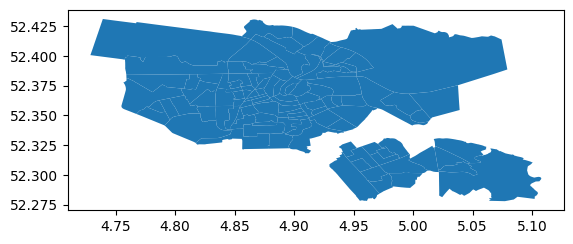

In [25]:
df_map = gpd.read_file('data/wijks.csv',GEOM_POSSIBLE_NAMES="geometry", 
                    KEEP_GEOM_COLUMNS="NO")
df_map.plot()

## Step 2: Loading data
### lorem impsum
    
lorem impsum